In [115]:
import sys
sys.path.append('../src')

import os
import re
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.basemap import Basemap

from matplotlib.lines import Line2D
from scipy.stats import gaussian_kde
from tqdm import tqdm

import dataloader

%load_ext autoreload
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

model_name = 'unet01-unet'
data_dir = '/mnt/conus3/jason_conus3/'
results_dir = '/mnt/mlnas01/stock/'
ymax = 60

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


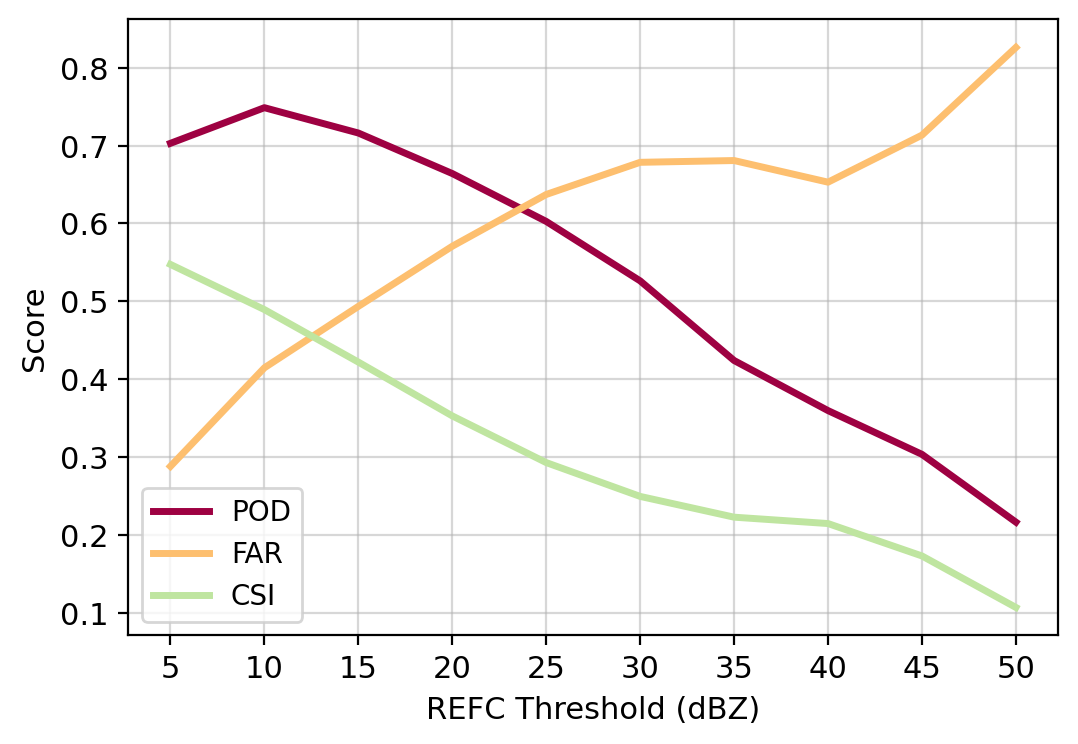

In [4]:
# load json formated string file
model = 'unet01-unet' # 'complete01-vit'
with open(f'/mnt/mlnas01/stock/{model}/stats.json') as f:
    stats = json.loads(json.load(f))

media_path = '../media'

cmap = plt.get_cmap('Spectral', 4)

fontsize = 11
lw = 2.5
metrics = ['pod', 'far', 'csi'] # bias
ls = ['-', '--', ':']

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
for i, m in enumerate(metrics):
    ax.plot(stats['ref'], np.array(stats[m]),
            label=m.upper(), ls=ls[0], lw=lw, color=cmap(i))
ax.set_xticks(stats['ref'])

ax.set_xlabel('REFC Threshold (dBZ)', fontsize=fontsize)
ax.set_ylabel('Score', fontsize=fontsize)
ax.tick_params(axis='both', labelsize=fontsize)
ax.legend(fontsize=fontsize-1)
ax.grid(alpha=0.4)

fig.savefig(os.path.join(media_path, f'refc_stats_{model}.png'),
            dpi=300, bbox_inches='tight')

In [ ]:
def make_rgb_transparent(rgb, bg_rgb, alpha):
    return [alpha * c1 + (1 - alpha) * c2
            for (c1, c2) in zip(rgb, bg_rgb)]

white = [1, 1, 1]

media_path = '../media'
# cmap = plt.get_cmap('Spectral', 10)
# colors = [cmap(8), cmap(2)]
colors = np.array([( 31,  63, 175), (207,  15,  23)]) / 255.
ls = ['-', '--', ':']

fontsize = 11
lw = 2.0

metrics = ['pod', 'far', 'csi'] # bias
models = ['complete01-vit', 'unet01-unet']
model_labels = ['ViT', 'UNet']

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax2 = ax.twinx()
for i in range(len(models)):
    # load json formated string file
    with open(f'/mnt/mlnas01/stock/{models[i]}/stats.json') as f:
        stats = json.loads(json.load(f))

    for j, m in enumerate(metrics):
        pl = ax.plot(stats['ref'], np.array(stats[m]),
                     ls=ls[j], lw=lw, color=colors[i])

    ax2.plot(stats['ref'], np.array(stats['rmses']),
             ls='-', lw=lw, color=make_rgb_transparent(colors[i], white, 0.4))#, alpha=0.5)

ax.set_xticks(stats['ref'])

ax.set_xlabel('REFC Threshold [dBZ]', fontsize=fontsize)
ax.set_ylabel('Score', fontsize=fontsize)
ax.tick_params(axis='both', labelsize=fontsize)
ax.grid(alpha=0.4)
ax.set_ylim([0, 1])

c = 'gray'
ax2.set_ylabel('RMSE', fontsize=fontsize, color=c)
ax2.tick_params(axis='both', labelsize=fontsize, colors=c)
ax2.spines['right'].set_color(c)
# ax2.set_ylim([5, 20])
metrics.append('rmse')
metrics_legend_colors = ['black']*len(ls) + ['gray']
ls.append('-')

h = [plt.plot([],[], color=colors[i], ls='-', lw=lw)[0] for i in range(len(model_labels))]
legend1 = ax.legend(handles=h, labels=model_labels, fontsize=fontsize-1)

h2 = [plt.plot([],[], color=metrics_legend_colors[i], 
               ls=ls[i], lw=lw)[0] for i in range(len(metrics))]
ax.legend(handles=h2, labels=[m.upper() for m in metrics], 
          ncol=4, columnspacing=0.8, labelcolor=metrics_legend_colors,
          fontsize=fontsize-1, loc='lower center')
ax.add_artist(legend1)

fig.savefig(os.path.join(media_path, f'refc_stats_multiple_2.png'),
            dpi=300, bbox_inches='tight')

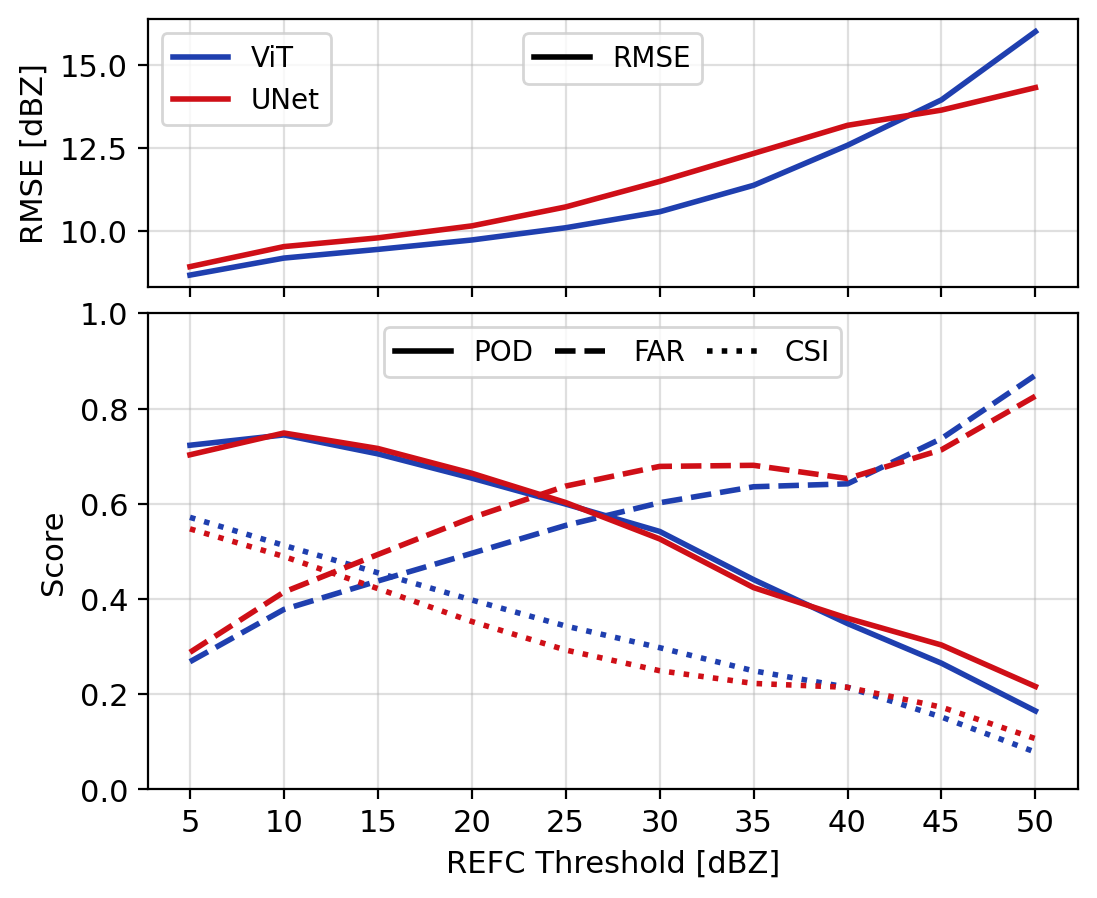

In [85]:
def make_rgb_transparent(rgb, bg_rgb, alpha):
    return [alpha * c1 + (1 - alpha) * c2
            for (c1, c2) in zip(rgb, bg_rgb)]

white = [1, 1, 1]

media_path = '../media'
# cmap = plt.get_cmap('Spectral', 10)
# colors = [cmap(8), cmap(2)]
colors = np.array([( 31,  63, 175), (207,  15,  23)]) / 255.
ls = ['-', '--', ':']

fontsize = 11
lw = 2.0

metrics = ['pod', 'far', 'csi'] # bias
models = ['complete01-vit', 'unet01-unet']
model_labels = ['ViT', 'UNet']

fig, (ax, ax2) = plt.subplots(2, 1, figsize=(6, 5), 
                              gridspec_kw={'height_ratios': [1.8, 3.2]}, 
                              sharex=True)#, tight_layout=True)
rmses = []
for i in range(len(models)):
    # load json formated string file
    with open(f'/mnt/mlnas01/stock/{models[i]}/stats.json') as f:
        stats = json.loads(json.load(f))

    for j, m in enumerate(metrics):
        pl = ax2.plot(stats['ref'], np.array(stats[m]),
                     ls=ls[j], lw=lw, color=colors[i])

    rmses.append(np.array(stats['rmses']))
    ax.plot(stats['ref'], rmses[-1],
             ls='-', lw=lw, color=colors[i])
rmses = np.array(rmses)

ax.set_xticks([])
ax.grid(alpha=0.4)
ax.set_ylabel('RMSE [dBZ]', fontsize=fontsize)
ax.tick_params(axis='both', labelsize=fontsize)

offset = 0.3
# ax.set_ylim([rmses.min() - offset, rmses.max() + offset])

ax2.set_xticks(stats['ref'])
ax2.set_xlabel('REFC Threshold [dBZ]', fontsize=fontsize)
ax2.set_ylabel('Score', fontsize=fontsize)
ax2.tick_params(axis='both', labelsize=fontsize)
ax2.grid(alpha=0.4)
ax2.set_ylim([0, 1])

metrics_legend_colors = ['black']*len(ls)

h = [plt.plot([],[], color=colors[i], ls='-', lw=lw)[0] for i in range(len(model_labels))]
legend1 = ax.legend(handles=h, labels=model_labels, fontsize=fontsize-1)
h2 = [plt.plot([],[], color='k', ls='-', lw=lw)[0]]
ax.legend(handles=h2, labels=['RMSE'], 
          ncol=4, columnspacing=0.8, labelcolor='k',
          fontsize=fontsize-1, loc='upper center')
ax.add_artist(legend1)

h3 = [plt.plot([],[], color=metrics_legend_colors[i], 
               ls=ls[i], lw=lw)[0] for i in range(len(metrics))]
ax2.legend(handles=h3, labels=[m.upper() for m in metrics], 
          ncol=4, columnspacing=0.8, labelcolor=metrics_legend_colors,
          fontsize=fontsize-1, loc='upper center')


plt.subplots_adjust(hspace=0.07)

fig.savefig(os.path.join(media_path, f'refc_stats_multiple_3.png'),
            dpi=300, bbox_inches='tight')

In [47]:
# create a table of scores for each model
metrics = ['pod', 'far', 'csi', 'rmses', 'bias', 'rmse', 'rsqrd']
for model in ['complete01-vit', 'unet01-unet']:
    with open(f'/mnt/mlnas01/stock/{model}/stats.json') as f:
        stats = json.loads(json.load(f))

    print(f'{model}:')
    for m in metrics:
        print(f'{m.upper()}: {stats[m]}')
    print()

complete01-vit:
POD: [0.7229157064558657, 0.744610893790328, 0.7048154652646828, 0.653913397289989, 0.5993389681664528, 0.5419156355466433, 0.4406920805308757, 0.3484066790029899, 0.2650851758533532, 0.1648915427084808]
FAR: [0.2682073825183025, 0.378041547931808, 0.4377800943173111, 0.49595669310671636, 0.5545699228568244, 0.6021031086801251, 0.635706684434831, 0.6418954151180607, 0.7369112559748889, 0.8700838791378595]
CSI: [0.5714956803803378, 0.512608175689364, 0.4550678419682649, 0.39789735097551654, 0.34322670971882707, 0.2977502363473845, 0.24911571077968692, 0.21446850219970742, 0.15212894120271434, 0.07835844339811242]
RMSES: [8.65699943645957, 9.171890540638248, 9.434663158163568, 9.719052587314918, 10.089793336999765, 10.572425857777633, 11.373131702026662, 12.584997268367376, 13.958267360627369, 16.0229287118729]
BIAS: [0.9878696357222354, 1.1972035934462841, 1.253629510696253, 1.297335741487062, 1.3455287348586609, 1.3619499105636133, 1.2097177238818695, 0.9729187888444749

In [53]:
# compute differences between each model's metric
metrics = ['pod', 'far', 'csi', 'rmses', 'bias', 'rmse', 'rsqrd']

print(f"complete01-vit - unet01-unet\n{'-'*30}")
for m in metrics:

    with open(f'/mnt/mlnas01/stock/complete01-vit/stats.json') as f:
        stats1 = json.loads(json.load(f))

    with open(f'/mnt/mlnas01/stock/unet01-unet/stats.json') as f:
        stats2 = json.loads(json.load(f))

    print(f'{m.upper()}: {np.array(stats1[m]) - np.array(stats2[m])}')

complete01-vit - unet01-unet
------------------------------
POD: [ 0.02004727 -0.0040197  -0.01129091 -0.01014181 -0.00320809  0.01574251
  0.01679446 -0.01114023 -0.03826745 -0.05138069]
FAR: [-0.01973661 -0.03647207 -0.05562897 -0.07469055 -0.08257142 -0.07636217
 -0.04503969 -0.01106803  0.02352367  0.04407193]
CSI: [ 2.41878365e-02  2.33124802e-02  3.32016503e-02  4.51619302e-02
  5.04451335e-02  4.84109354e-02  2.64662976e-02  5.96765795e-06
 -2.07161897e-02 -2.83500719e-02]
RMSES: [-0.25539015 -0.34717342 -0.34843774 -0.42651302 -0.62977593 -0.9180973
 -0.96382114 -0.60302883  0.30973669  1.69416346]
BIAS: [ 0.00077252 -0.08144372 -0.15994962 -0.24930672 -0.31502711 -0.27449272
 -0.11805926 -0.06313032 -0.0508187   0.0261862 ]
RMSE: -0.11584917571870434
RSQRD: 0.08369678951475279


In [2]:
def get_data(filename):
    loss, met = [], [] # assumes (train, val) dims
    with open(filename) as fi:
        for ln in fi:
            if ln.startswith('train loss'):
                ln = ln.rstrip()
                loss.append(re.findall(r'loss: (\d+\.\d+)', ln))
                met.append(re.findall(r'met: (\d+\.\d+)', ln))

    loss = np.stack(loss).astype(float)
    met = np.stack(met).astype(float)
    return loss, met

In [3]:
log = 'log_4656'
loss, met = get_data(f'../logs/{log}.out')

/tmp/tmp.WBZVOww7Er/ipykernel_4071090/3064292141.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Spectral', 8)


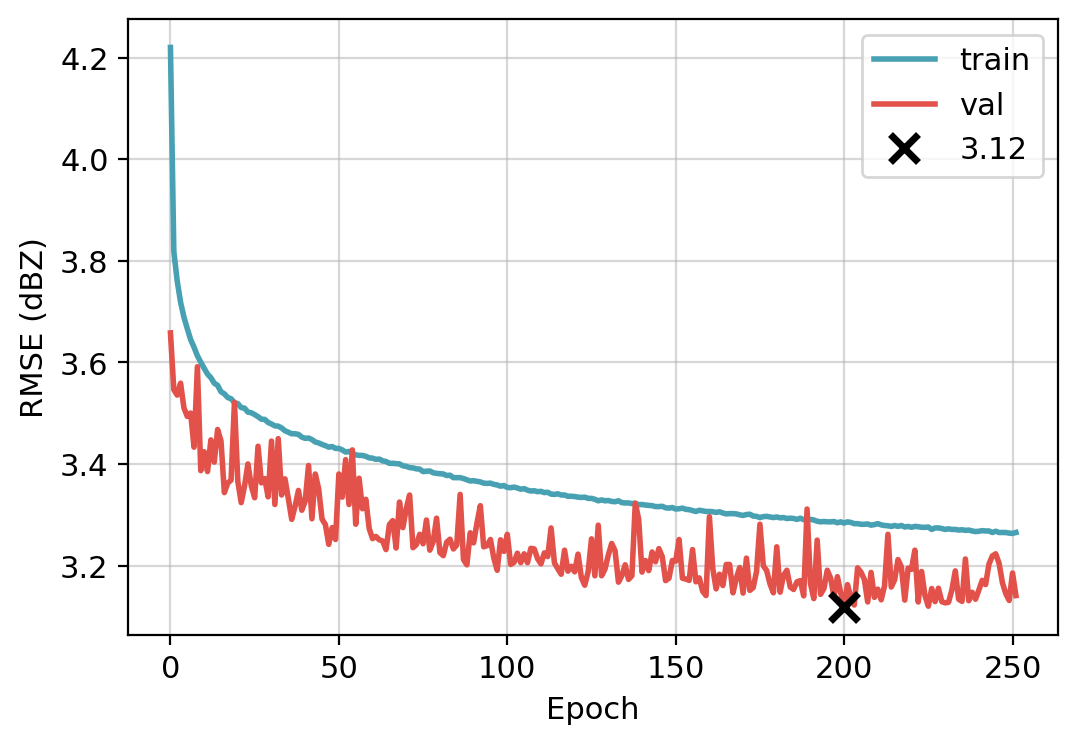

In [4]:
cmap = cm.get_cmap('Spectral', 8)

fontsize = 11
lw = 2
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(met[:,0] * ymax, label='train', ls='-', lw=lw,
        color=cmap(6))
ax.plot(met[:,1] * ymax, label='val', ls='-', lw=lw, 
        color=cmap(1))
min_x = np.argmin(met[:,1])
min_y = met[min_x,1] * ymax
ax.plot(min_x, min_y, 'x', color='black', ms=10, mew=2.5, label=f'{min_y:.2f}')
ax.set_xlabel('Epoch', fontsize=fontsize)
ax.set_ylabel('RMSE (dBZ)', fontsize=fontsize)
ax.tick_params(axis='both', labelsize=fontsize)
ax.legend(fontsize=fontsize)
ax.grid(alpha=0.5)
fig.savefig(os.path.join('../media', f'{log}_loss.png'), dpi=300, bbox_inches='tight')

In [4]:
xt_samples = []
v = os.path.join(data_dir, 'test')
for f in os.listdir(v):
    if 'regA' in f and f.endswith('.npz'):
        xt_samples.append(os.path.join(v, f))
xt_samples.sort()

y_samples = []
v = os.path.join(results_dir, model_name)
for f in os.listdir(v):
    if f.endswith('.npy'):
        y_samples.append(os.path.join(v, f))
y_samples.sort()

In [357]:
import pandas as pd

In [360]:
number_date_file = '/mnt/conus3/jason_conus3/sample_numbers_dates_regA_sclA.txt'
number_date_df = pd.read_csv(number_date_file, sep=' ', header=None, names=['kind', 'number', 'date'])
# only keep the test samples
number_date_df = number_date_df[number_date_df.kind == 'test'].reset_index(drop=True)
number_date_df.head()

kind  number               date
0  test       1  2022-04-01_00:00Z
1  test       2  2022-04-01_00:15Z
2  test       3  2022-04-01_00:30Z
3  test       4  2022-04-01_00:45Z
4  test       5  2022-04-01_01:00Z

In [361]:
rmse = lambda t, y: np.sqrt(np.mean((y - t)**2))
mse = lambda t, y: np.mean((y - t)**2)

def load_xty(xt, y, idx, flip=False):
    with np.load(xt[idx]) as data:  # C x H x W
        x = np.moveaxis(data['xdata'], -1, 0)
        t = data['ydata'][np.newaxis, ...] * ymax

    y = np.load(y[idx]) * ymax

    if flip:
        x = np.flip(x, axis=1)
        y = np.flip(y, axis=1)
        t = np.flip(t, axis=1)
    
    return x, t, y

In [363]:
index = 1500 # 5000
x, t, y = load_xty(xt_samples, y_samples, index)
date = number_date_df.loc[index - 1, 'date']
print(date, x.shape, t.shape, y.shape)

2022-04-16_17:30Z (4, 768, 1536) (1, 768, 1536) (1, 768, 1536)


(-0.5, 1535.5, 767.5, -0.5)

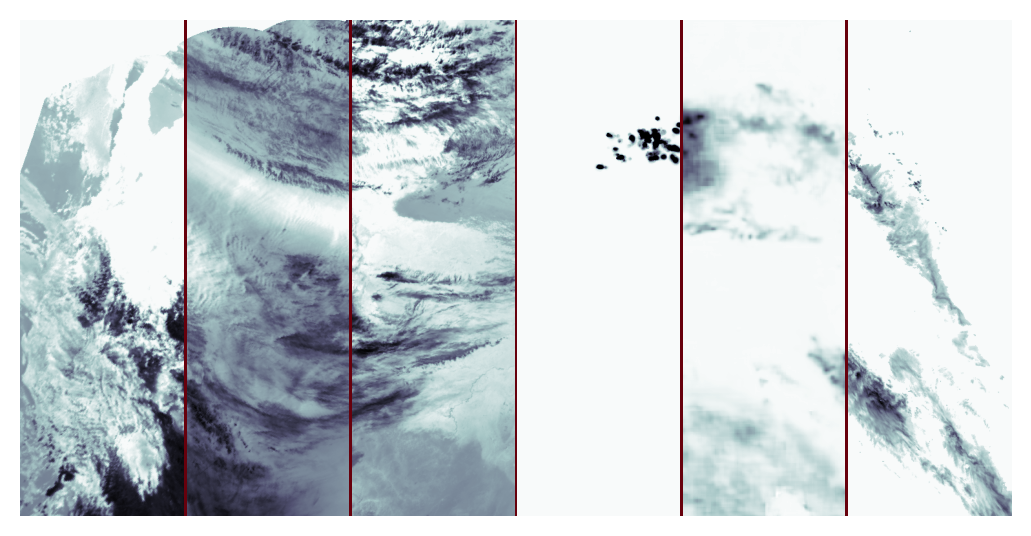

In [418]:
z = np.concatenate([x, y, t], axis=0)
intervals = np.linspace(0, z.shape[2], z.shape[0] + 1, dtype=int)
for i in range(len(intervals)-1):
    z[i, :, intervals[i+1]:] = 0
    z[i, :, :intervals[i]] = 0
    z[i] = (z[i] - z[i].min()) / (z[i].max() - z[i].min())

z = z.sum(axis=0)

boarders = np.zeros_like(z)
for i in range(1, len(intervals) - 1):
    boarders[:, intervals[i]-3:intervals[i]+3] = 1.0
boarders = np.ma.masked_where(boarders == 0, boarders)

plt.imshow(z, cmap='bone_r')
plt.imshow(boarders, cmap='Reds', vmin=0, vmax=1)
plt.axis('off')

In [257]:
rgb_colors = [] # new: CVD accessible
rgb_colors.append((231, 231, 231))  #0
rgb_colors.append((111, 239, 255))  #5
rgb_colors.append(( 95, 207, 239))  #10
rgb_colors.append(( 79, 175, 223))  #15
rgb_colors.append(( 47,  95, 191))  #20
rgb_colors.append(( 31,  63, 175))  #25
rgb_colors.append(( 15,  31, 159))  #30
rgb_colors.append((247, 239,  63))  #35
rgb_colors.append((239, 191,  55))  #40
rgb_colors.append((231, 143,  47))  #45
rgb_colors.append((207,  15,  23))  #50
rgb_colors.append((183,   7,  15))  #55
rgb_colors.append((159,   0,   8))  #60

colors = []
for atup in rgb_colors:
    colors.append('#%02x%02x%02x'%atup)

cmap = ListedColormap(colors,'distrib')
cmap.set_over(colors[-1])
cmap.set_under(colors[0])
# cmap.set_under('white')

bounds = np.linspace(0, z.max(), 13).tolist()
ticklabels = [str(a) for a in bounds]

norm = BoundaryNorm(bounds,cmap.N)

In [384]:
from matplotlib.patches import FancyArrowPatch

/tmp/ipykernel_2903131/4187568568.py:33: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcm = basemap.pcolormesh(xlon,ylat,z,cmap=cmap,norm=norm)
/tmp/ipykernel_2903131/4187568568.py:34: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  boarder = basemap.pcolormesh(xlon,ylat,boarders,cmap='binary', vmin=0, vmax=1)


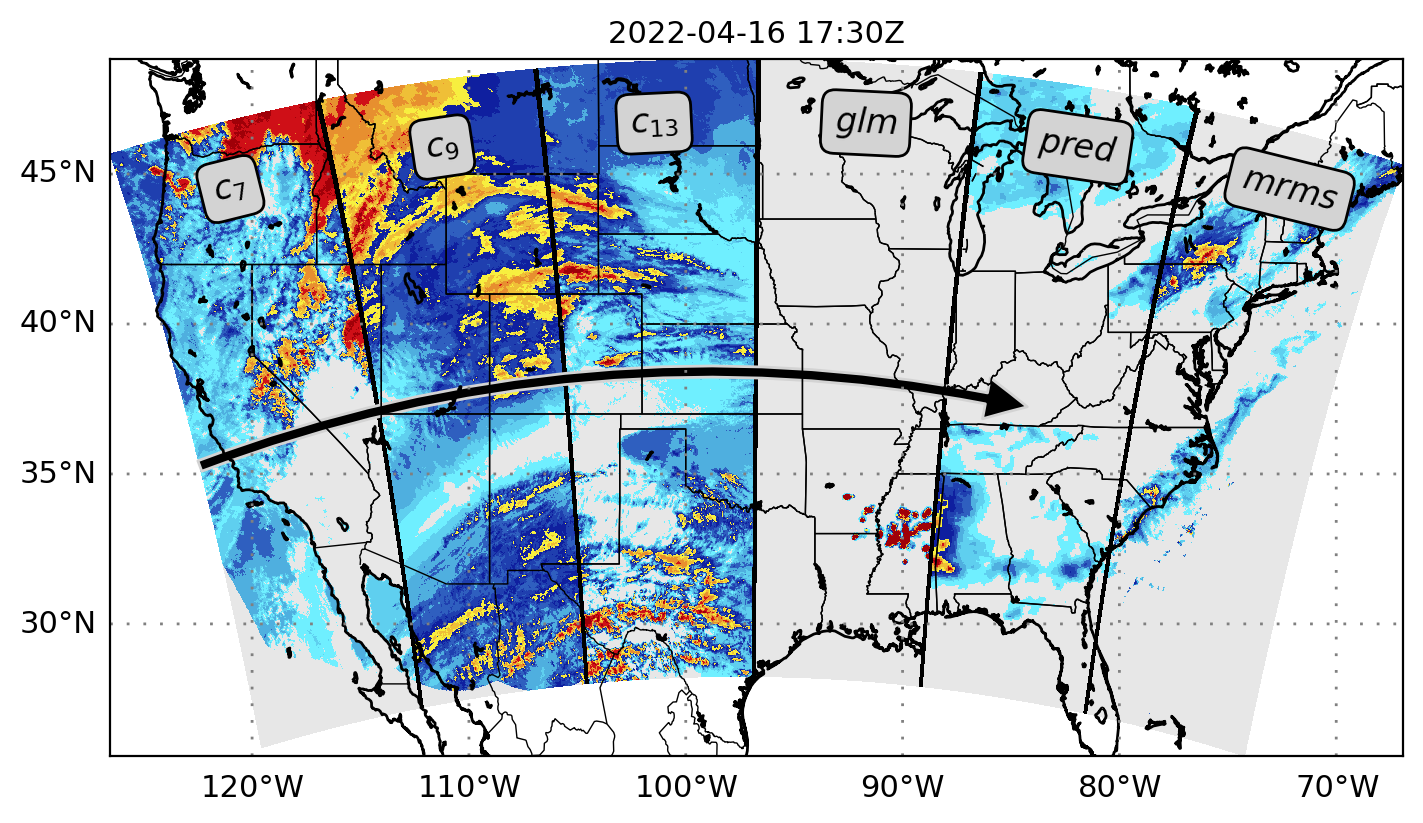

In [435]:
hrrr_grid_file = '/mnt/conus3/jason_conus3/code/hrrr_grid.bin'

nlon = 1799
nlat = 1059
count = nlat*nlon
shape = (nlat,nlon)

with open(hrrr_grid_file,'rb') as f:
    lon = np.fromfile(f,dtype=np.float64,count=count).reshape(shape)
    lat = np.fromfile(f,dtype=np.float64,count=count).reshape(shape)

#TODO: close :)
lon = lon[147:nlat-144, 153:nlon-110]
lat = lat[147:nlat-144, 153:nlon-110]

basemap = {}
basemap['projection'] = 'cyl'
basemap['resolution'] = 'i'
basemap['fix_aspect'] = False
basemap['llcrnrlon'] = lon.min()
basemap['urcrnrlon'] = lon.max()
basemap['llcrnrlat'] = lat.min()
basemap['urcrnrlat'] = lat.max()
basemap = Basemap(**basemap)

xlon,ylat = basemap(lon,lat)

fontsize = 11

fig = plt.figure(figsize=(7,4), constrained_layout=True)
ax = plt.subplot(1, 1, 1)

pcm = basemap.pcolormesh(xlon,ylat,z,cmap=cmap,norm=norm)
boarder = basemap.pcolormesh(xlon,ylat,boarders,cmap='binary', vmin=0, vmax=1)

labels = [f'$c_{{{i}}}$' for i in [7,9,13]] + [f'$glm$'] + [f'$pred$'] + [f'$mrms$'] 
rotations = np.linspace(14, -14, len(labels))
yoffset = [0, 1.4, 2.2, 2.2, 1.4, 0]
for i, l in enumerate(labels):
    ax.annotate(l, xy=basemap(-121 + (i * 9.77), 44.5 + yoffset[i]), color='black', fontsize=fontsize + 1, rotation=rotations[i], ha='center', va='center',
                bbox=dict(facecolor='lightgray', edgecolor='black', boxstyle='round, pad=0.4'))

kw = dict(arrowstyle="Simple,tail_width=4,head_width=15,head_length=15")
a1 = FancyArrowPatch(basemap(-122.65, 35.2), basemap(-84, 37.2), connectionstyle="arc3,rad=-0.15", ec='lightgray', fc='k', **kw)
ax.add_patch(a1)

basemap.drawcoastlines()
basemap.drawcountries()
basemap.drawstates()
basemap.drawparallels(np.arange(20.,50.,5.),color='gray',dashes=[1,5],labels=[1,0,0,0], fontsize=fontsize);
basemap.drawmeridians(np.arange(50.,360.,10.),color='gray',dashes=[1,5],labels=[0,0,0,1], fontsize=fontsize);

ax.set_title(date.replace('_', ' '), fontsize=fontsize);

fig.savefig(f'../media/input_output_{index}.png', dpi=300, bbox_inches='tight')

In [48]:
shape = ts.shape[1:]
n = 0
diffs = 0
for i in zip(ts, ys):
    x, t, y = load_xty(xt_samples, y_samples, i)
    diffs += np.sum((t - y)**2)
    n += 1
np.sqrt(diffs / (n * np.prod(shape)))

197.308524973401

(4, 768, 1536) (1, 768, 1536) (1, 768, 1536)
rmse: 3.48781, rmse: 12.16485


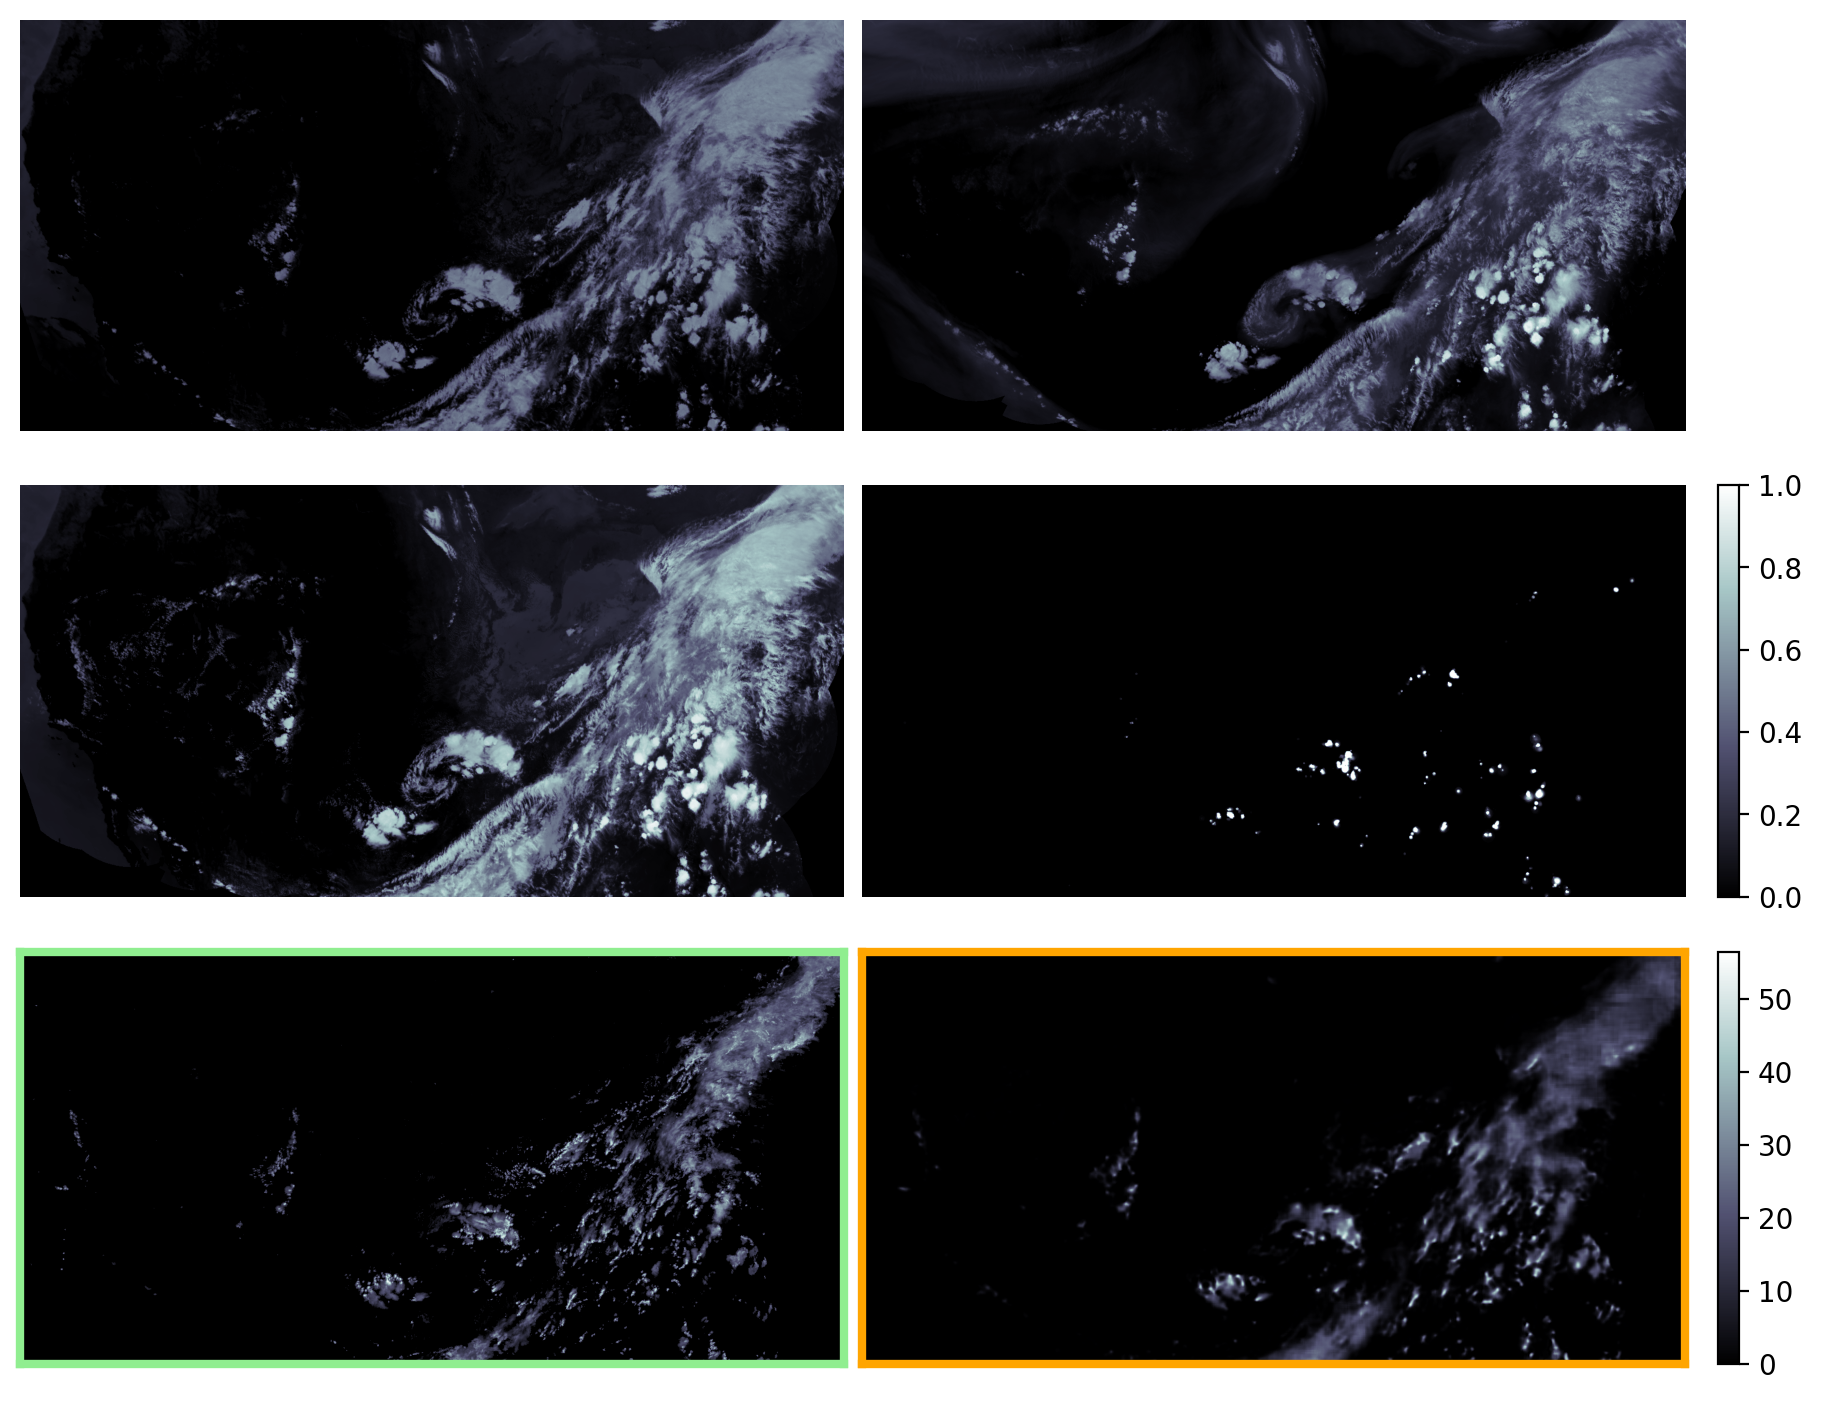

In [13]:
index = 15000
x, t, y = load_xty(xt_samples, y_samples, index)
print(x.shape, t.shape, y.shape)

fig, axs = plt.subplots(3, 2, figsize=(9,7), constrained_layout=True)
axs = axs.ravel()
for i in range(x.shape[0]):
    imx = axs[i].imshow(x[i], cmap='bone', vmin=x.min(), vmax=x.max())
    axs[i].axis('off')
fig.colorbar(imx, ax=axs[3], fraction=0.025, pad=0.04)

axs[-2].imshow(t[0], cmap='bone', vmin=t.min(), vmax=t.max())
imt = axs[-1].imshow(y[0], cmap='bone', vmin=t.min(), vmax=t.max())
fig.colorbar(imt, ax=axs[-1], fraction=0.025, pad=0.04)

for spine in axs[-2].spines.values():
    spine.set_edgecolor('lightgreen')
    spine.set_linewidth(3)

for spine in axs[-1].spines.values():
    spine.set_edgecolor('orange')
    spine.set_linewidth(3)

for ax in axs:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

fig.savefig(f'../media/{log}_test_{index}.png', dpi=300, bbox_inches='tight')

print(f'rmse: {rmse(y, t):.5f}, rmse: {mse(y, t):.5f}')

In [467]:
dataset = 'test'
distribution_sample_map = np.load(os.path.join(results_dir, f'distribution_sample_map_{dataset}.npy'))
output_sample_counts = np.load(os.path.join(results_dir, f'output_sample_counts_{dataset}.npy')) / np.prod((1, 768, 1536))
top_perc = np.percentile(distribution_sample_map, 99)
distribution_sample_map = distribution_sample_map.clip(0, top_perc)

In [468]:
rgb_colors = [] # new: CVD accessible
rgb_colors.append((231, 231, 231))  #0
rgb_colors.append((111, 239, 255))  #5
rgb_colors.append(( 95, 207, 239))  #10
rgb_colors.append(( 79, 175, 223))  #15
rgb_colors.append(( 47,  95, 191))  #20
rgb_colors.append(( 31,  63, 175))  #25
rgb_colors.append(( 15,  31, 159))  #30
rgb_colors.append((247, 239,  63))  #35
rgb_colors.append((239, 191,  55))  #40
rgb_colors.append((231, 143,  47))  #45
rgb_colors.append((207,  15,  23))  #50
rgb_colors.append((183,   7,  15))  #55
rgb_colors.append((159,   0,   8))  #60

colors = []
for atup in rgb_colors:
    colors.append('#%02x%02x%02x'%atup)

cmap = ListedColormap(colors,'distrib')
cmap.set_over(colors[-1])
cmap.set_under(colors[0])

bounds = np.linspace(0, top_perc, 13).tolist()
ticklabels = [str(a) for a in bounds]

norm = BoundaryNorm(bounds,cmap.N)

/tmp/ipykernel_869381/1298139018.py:42: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcm = basemap.pcolormesh(x,y,distribution_sample_map,cmap=cmap,norm=norm)


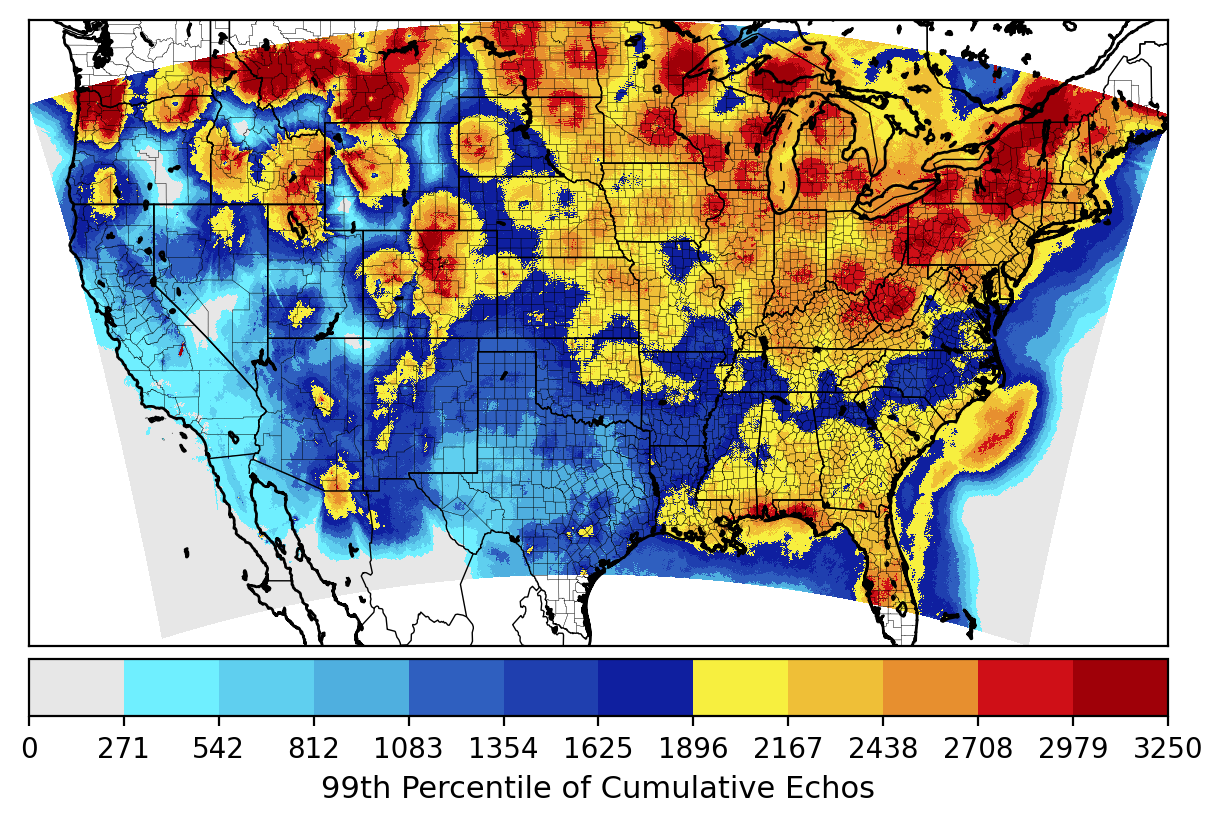

In [469]:
## OLD
# distribution_sample_map = np.flip(distribution_sample_map, axis=0)
# fig, ax = plt.subplots(1,1, figsize=(6,4), constrained_layout=True)
# im = ax.imshow(distribution_sample_map, cmap=cmap, norm=norm)
# ax.axis('off')
# cb = fig.colorbar(im, ax=ax, ticks=bounds, fraction=0.024, pad=0.02)
# # fig.savefig(f'../media/distribution_map_{dataset}.png', dpi=300, bbox_inches='tight')
# plt.show()

hrrr_grid_file = '/mnt/conus3/jason_conus3/code/hrrr_grid.bin'

nlon = 1799
nlat = 1059
count = nlat*nlon
shape = (nlat,nlon)

with open(hrrr_grid_file,'rb') as f:
    lon = np.fromfile(f,dtype=np.float64,count=count).reshape(shape)
    lat = np.fromfile(f,dtype=np.float64,count=count).reshape(shape)

#TODO: close :)
lon = lon[147:nlat-144, 153:nlon-110]
lat = lat[147:nlat-144, 153:nlon-110]

basemap = {}
basemap['projection'] = 'cyl'
basemap['resolution'] = 'i'
basemap['fix_aspect'] = False
basemap['llcrnrlon'] = lon.min()
basemap['urcrnrlon'] = lon.max()
basemap['llcrnrlat'] = lat.min()
basemap['urcrnrlat'] = lat.max()
basemap = Basemap(**basemap)

x,y = basemap(lon,lat)

fontsize = 11

fig = plt.figure(figsize=(6,4), constrained_layout=True)
plt.subplot(1, 1, 1)

pcm = basemap.pcolormesh(x,y,distribution_sample_map,cmap=cmap,norm=norm)

basemap.drawcoastlines()
basemap.drawcountries()
basemap.drawstates()
basemap.drawcounties()

cb = plt.colorbar(pcm,ticks=bounds,orientation='horizontal',fraction=0.1,pad=0.02)
cb.set_label('99th Percentile of Cumulative Echos', fontsize=fontsize)

fig.savefig(f'../media/distribution_map_{dataset}.png', dpi=300, bbox_inches='tight')

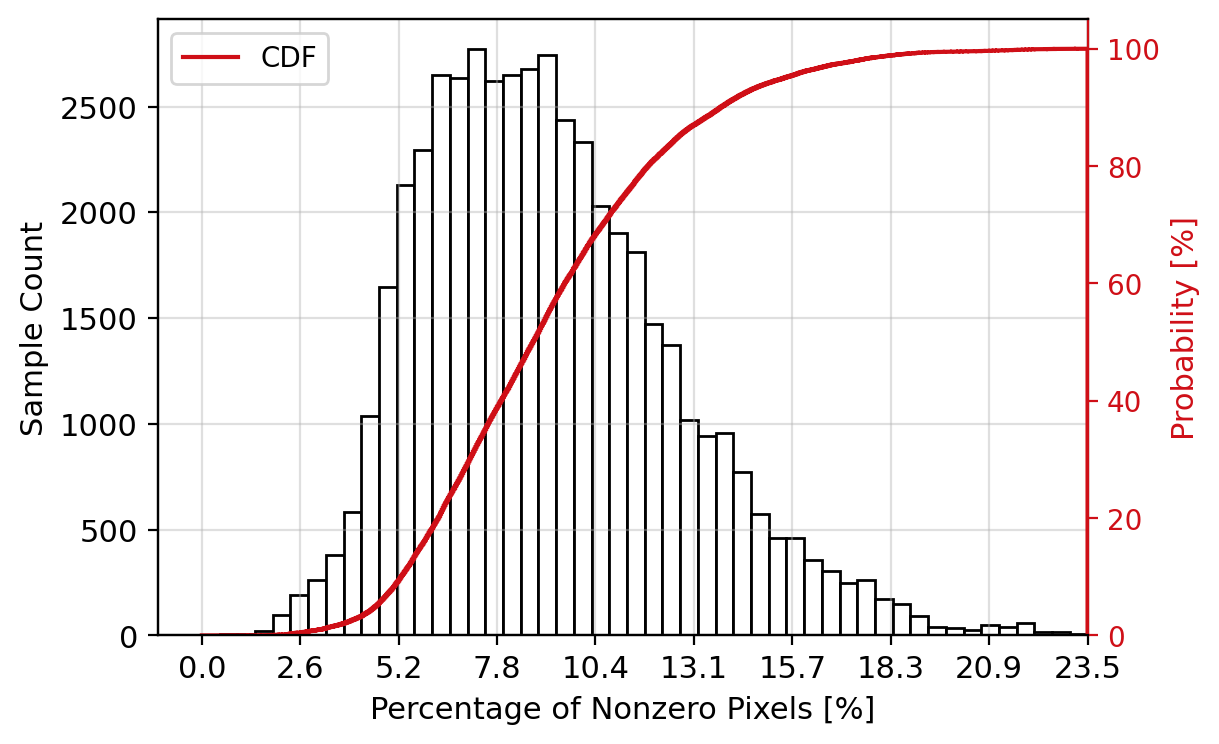

non-zero train data mean: 9.20%


In [228]:
# cmap = plt.get_cmap('Spectral', 8)
# color = cmap(1)
color = (np.array([(207,  15,  23)]) / 255.)[0]
fontsize = 11
lw = 1.5

fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.hist(output_sample_counts, bins=50, density=False,
        facecolor='w', edgecolor='k')
# ax.set_title(f'non-zero {dataset} data')
ax.set_xlabel(f'Percentage of Nonzero Pixels [%]', fontsize=fontsize)
ax.set_ylabel(f'Sample Count', fontsize=fontsize)

frequencies = np.linspace(0,  output_sample_counts.max(), 10)
ax.set_xticks(frequencies)
scaled_ticks = [f'{f * 100:.1f}' for f in frequencies]
ax.set_xticklabels(scaled_ticks)

ax2 = ax.twinx()
ax2.hist(output_sample_counts, cumulative=1, lw=lw,
         histtype='step', bins=1000, color=color)
ax.set_xlim((ax.get_xlim()[0], output_sample_counts.max()))
ax2.tick_params(axis='y', colors=color)
ax2.spines['right'].set_color(color)
ax2.set_ylabel('Probability [%]', fontsize=fontsize, color=color)

frequencies = np.linspace(0, len(output_sample_counts), 6)
ax2.set_yticks(frequencies)
scaled_ticks = [f'{int(f / frequencies.max() * 100)}' for f in frequencies]
ax2.set_yticklabels(scaled_ticks)

custom_legend = [Line2D([0],[0], color=color, lw=lw)]
ax2.legend(custom_legend, ['CDF'], fontsize=fontsize-1)

ax.tick_params(axis='both', labelsize=fontsize)

# kds = gaussian_kde(output_sample_counts)
# xs = np.linspace(output_sample_counts.min(), 
#                  output_sample_counts.max(), 1000)
# ax.plot(xs, kds(xs), '-k')

ax.grid(alpha=0.4)
fig.savefig(f'../media/distribution_{dataset}.png', dpi=300, bbox_inches='tight')
plt.show()

print(f'non-zero {dataset} data mean: {output_sample_counts.mean() * 100:.2f}%')

In [26]:
dataset = 'test'
mrms_grad = np.load(os.path.join(results_dir, f'gradient_magnitude_mrms_{dataset}.npy'))
vit_grad = np.load(os.path.join(results_dir, f'gradient_magnitude_complete01-vit_{dataset}.npy'))
unet_grad = np.load(os.path.join(results_dir, f'gradient_magnitude_unet01-unet_{dataset}.npy'))

In [36]:
from scipy.stats import wilcoxon, ttest_ind, levene

def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1) ** 2 
                                                + (ny-1)*np.std(y, ddof=1) ** 2) / dof)

# Perform Levene's test for equal variance
statistic, p_value = levene(vit_grad, unet_grad)

# Output the results
print("Levene's test for equal variance:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("The variances are not equal.")
else:
    print("The variances are equal.")

# Perform the independent t-test
t_statistic, p_value = ttest_ind(vit_grad, unet_grad, equal_var=False) 

print("Welche's t-test:")
print(f"Statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("The difference in means is statistically significant.")
else:
    print("There is no statistically significant difference in means.")

# Perform the Wilcoxon signed-rank test
statistic, p_value = wilcoxon(vit_grad, unet_grad)

cohens_d = cohen_d(vit_grad, unet_grad)

# Output the results
print("Wilcoxon signed-rank test:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Cohen's d for paired data: {cohens_d}")

# Check if the p-value is below the chosen significance level (e.g., 0.05) to reject the null hypothesis
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the models' gradient magnitudes.")
else:
    print("There is no significant difference between the models' gradient magnitudes.")

Levene's test for equal variance:
Statistic: 155.60357991030324
P-value: 1.2326145103200897e-35
The variances are not equal.
Welche's t-test:
Statistic: 27.71041074918643
P-value: 3.7373207672358564e-167
The difference in means is statistically significant.
Wilcoxon signed-rank test:
Statistic: 3809229.5
P-value: 0.0
Cohen's d for paired data: 0.2975660148563496
There is a significant difference between the models' gradient magnitudes.


In [4]:
Wilcoxon signed-rank test:
Statistic: 3809229.5
P-value: 0.0
There is a significant difference between the models' gradient magnitudes.

0.0

In [11]:
# sort
mrms_grad = np.sort(mrms_grad)
vit_grad = np.sort(vit_grad)
unet_grad = np.sort(unet_grad)

mrms_grad.shape, vit_grad.shape, unet_grad.shape

((17344,), (17344,), (17344,))

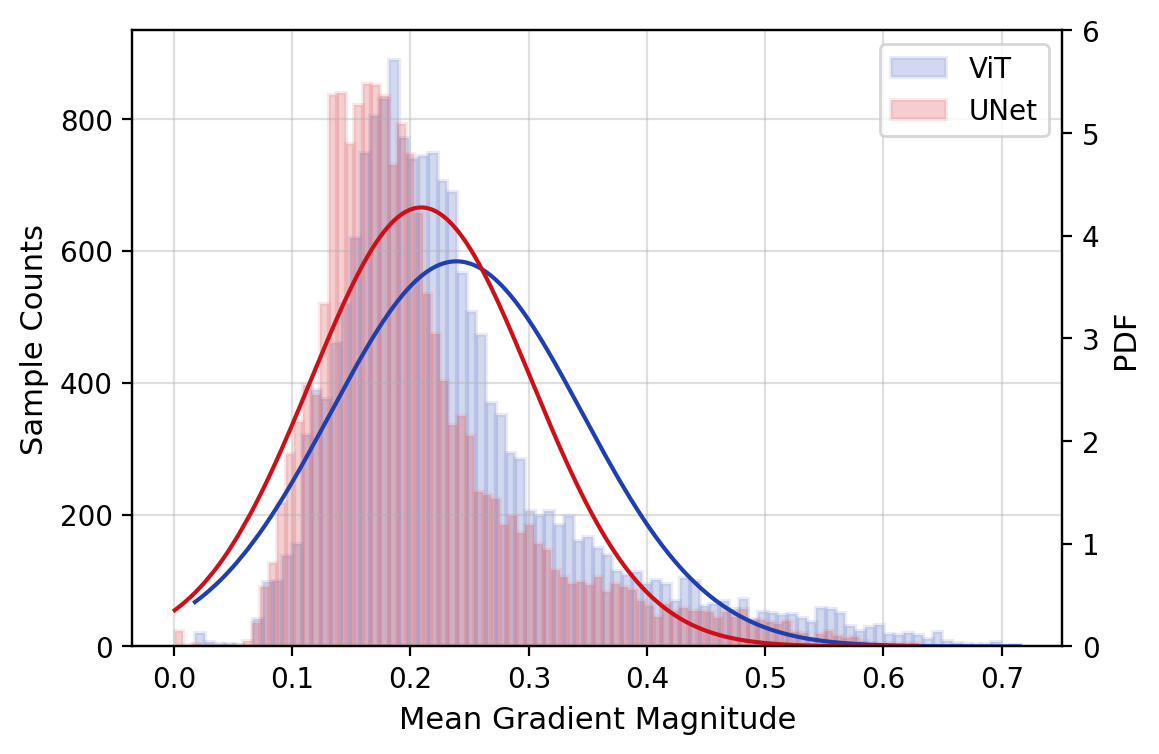

In [377]:
def make_rgb_transparent(rgb, bg_rgb, alpha):
    return [alpha * c1 + (1 - alpha) * c2
            for (c1, c2) in zip(rgb, bg_rgb)]

white = [1, 1, 1]
alpha = .25
colors = np.array([( 31,  63, 175), (207,  15,  23)]) / 255.

labels = ['ViT', 'UNet']
data = [vit_grad, unet_grad]
means = [d.mean() for d in data]
stds = [d.std() for d in data]

fontsize = 11
lw = 1.5

fig, ax = plt.subplots(1,1, figsize=(6,4))
for i in range(len(data)):
    # ax.hist(data[i], bins=40, density=False, histtype='stepfilled', 
    #         color=colors, label=labels[i], lw=lw, alpha=1, edgecolor='k')
    ax.hist(data[i], bins='auto', density=False, 
            facecolor=colors[i],
            edgecolor=make_rgb_transparent(colors[i], white, .5), 
            label=labels[i], lw=lw, alpha=.2)

ax.set_xlabel(f'Mean Gradient Magnitude', fontsize=fontsize)
ax.set_ylabel(f'Sample Counts', fontsize=fontsize)

ax2 = ax.twinx()
for i in range(len(data)):
    # ax2.axvline(x=means[i], color=colors[i], lw=1., ls='--', alpha=0.5)
    ax2.plot(data[i], norm.pdf(data[i], means[i], stds[i]), 
             color=colors[i], lw=lw)
ax2_color = 'black'
ax2.tick_params(axis='y', colors=ax2_color)
ax2.spines['right'].set_color(ax2_color)
ax2.set_ylabel('PDF', fontsize=fontsize, color=ax2_color)
ax2.set_ylim(bottom=0, top=6)

ax.grid(alpha=0.4)
ax.legend(fontsize=fontsize-1)

plt.show()

In [2]:
from scipy.stats import gaussian_kde

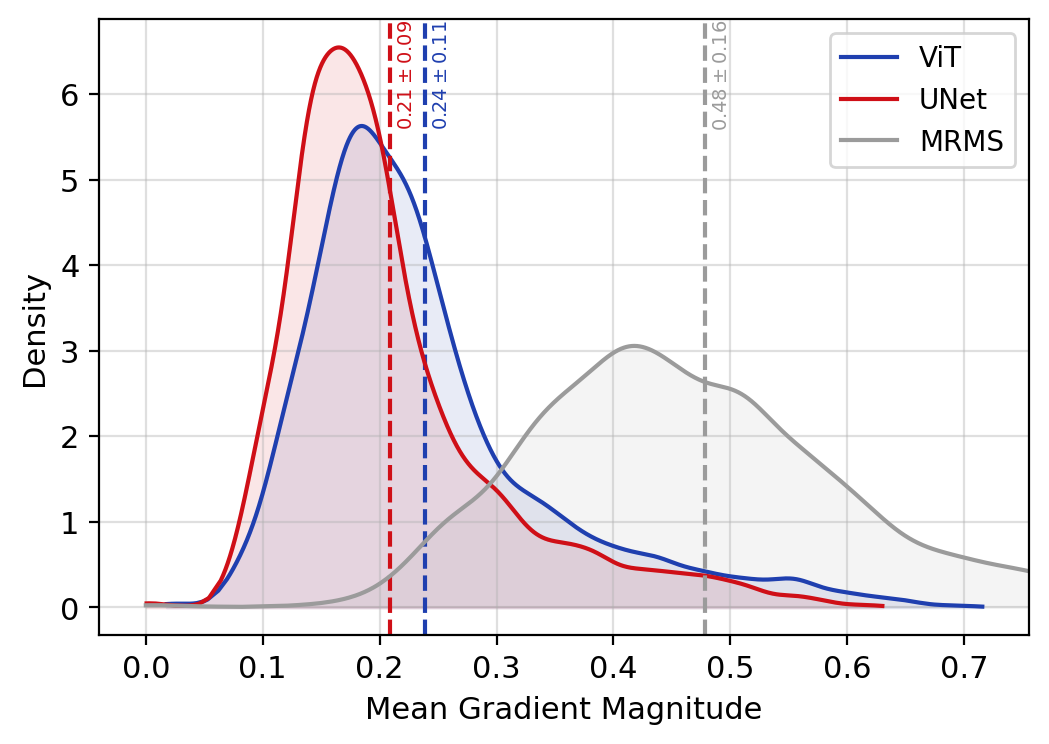

In [460]:
def make_rgb_transparent(rgb, bg_rgb, alpha):
    return [alpha * c1 + (1 - alpha) * c2
            for (c1, c2) in zip(rgb, bg_rgb)]

white = [1, 1, 1]
alpha = .5
colors = np.array([( 31,  63, 175), (207,  15,  23), (155, 155, 155)]) / 255.

labels = ['ViT', 'UNet', 'MRMS']
data = [vit_grad, unet_grad, mrms_grad]
means = [d.mean() for d in data]
stds = [d.std() for d in data]

fontsize = 11
lw = 1.5

fig, ax = plt.subplots(1,1, figsize=(6,4))

for i in range(len(data)):
    x = data[i]
    # y = norm.pdf(x, means[i], stds[i])
    kernel = gaussian_kde(x)
    y = kernel(x)

    ax.axvline(x=means[i], color=colors[i], lw=lw, ls='--', alpha=1.)
    ax.plot(x, y, color=colors[i], lw=lw, label=labels[i])
    ax.fill_between(x, y, color=colors[i], alpha=0.1)

ymin, ymax = ax.get_ylim()
for i in range(len(data)):
    ax.text(means[i] + .006, ymax, f'${means[i]:.2f} \pm {stds[i]:.2f}$', 
            color=colors[i], fontsize=fontsize-4,
            rotation=90, verticalalignment='top')

ax.set_xlabel(f'Mean Gradient Magnitude', fontsize=fontsize)
ax.set_ylabel(f'Density', fontsize=fontsize)
ax.legend(fontsize=fontsize-1)
ax.grid(alpha=0.4)
ax.tick_params(axis='both', labelsize=fontsize)

maximum = np.max(data[:2])
offset = 0.04
ax.set_xlim(left=0-offset, right=maximum+offset)

fig.savefig(f'../media/grad_kde_{dataset}.png', dpi=300, bbox_inches='tight')
plt.show()

$0.21 \pm 0.09$


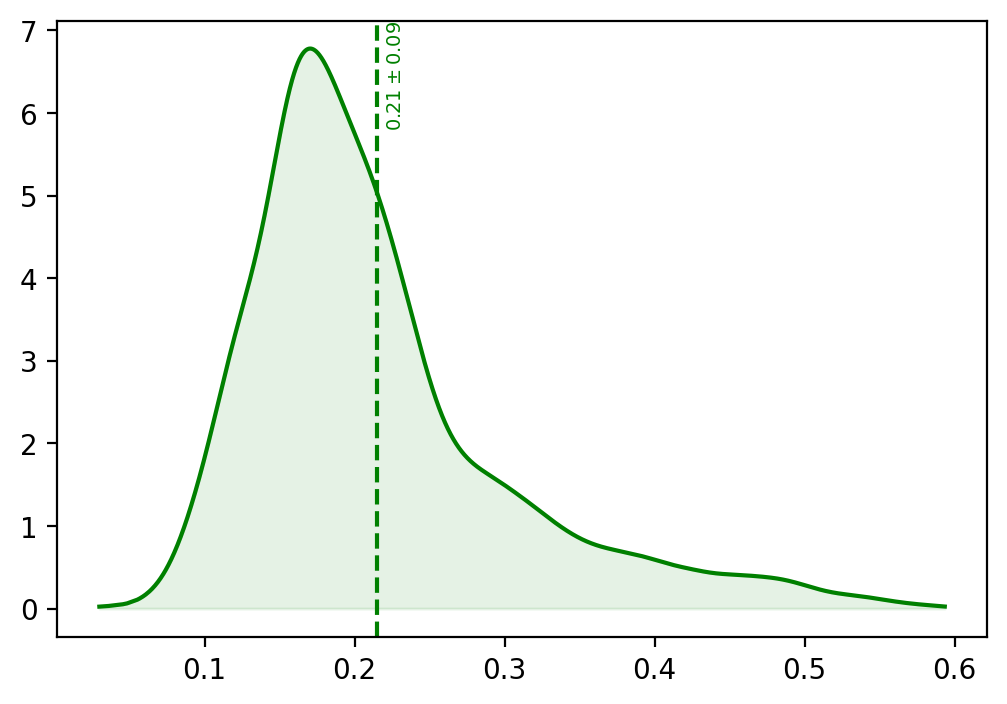

In [9]:
x = sorted(np.load('/mnt/mlnas01/stock/gradient_magnitude_base01-vit_test.npy'))
mean = data.mean()
std = data.std()
text = f'${mean:.2f} \pm {std:.2f}$'
print(text)

kernel = gaussian_kde(x)
y = kernel(x)
color = 'g'
lw = 1.5
fontsize = 11

fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.axvline(x=mean, color=color, lw=lw, ls='--', alpha=1.)
ax.plot(x, y, color=color, lw=lw, label='Base')
ax.fill_between(x, y, color=color, alpha=0.1)
ymin, ymax = ax.get_ylim()
ax.text(mean + .006, ymax, text, 
        color=color, fontsize=fontsize-4,
        rotation=90, verticalalignment='top')
plt.show()

In [458]:
from scipy import stats

In [459]:
res = stats.shapiro(vit_grad)
res.statistic
0.7888147830963135

/home/stock/.local/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.7888147830963135

In [149]:
def load_y(y_dir, idx):
    """
    Assumes data formated as: `test_predictions_000001.npy`
    """
    global ymax
    return np.clip(np.load(os.path.join(y_dir, f'test_predictions_{idx:06d}.npy')), 0, 1) * ymax

def load_xt(xt_dir, idx):
    """
    Assumes data formated as: `conus3_regA_sclA_000001.npz`
    """
    global ymax
    with np.load(os.path.join(xt_dir, f'conus3_regA_sclA_{idx:06d}.npz')) as data:  # C x H x W
        x = np.moveaxis(data['xdata'], -1, 0)
        t = data['ydata'][np.newaxis, ...] * ymax
    return x, t

def load_xty(xt_dir, y_dir, idx):
    x, t = load_xt(xt_dir, idx)
    y = load_y(y_dir, idx)
    return x, t, y

xt_dir = '/mnt/conus3/jason_conus3/test'
model = 'complete01-vit'
y_dir = f'/mnt/mlnas01/stock/{model}'

In [177]:
inds = np.random.randint(0, 15000, 500)
ts, ys = [], []
for i in tqdm(inds):
    ti, yi = load_xty(xt_dir, y_dir, i)[1:]
    ts.append(ti)
    ys.append(yi)
ts = np.concatenate(ts)
ys = np.concatenate(ys)

100%|██████████| 500/500 [04:43<00:00,  1.76it/s]  


In [178]:
rmse = lambda t, y: np.sqrt(np.mean((y - t)**2, axis=0))
err = rmse(ts, ys)
del ts, ys

/tmp/ipykernel_2435348/1070503404.py:65: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcm = basemap.pcolormesh(x,y,err_nan,cmap=cmap)


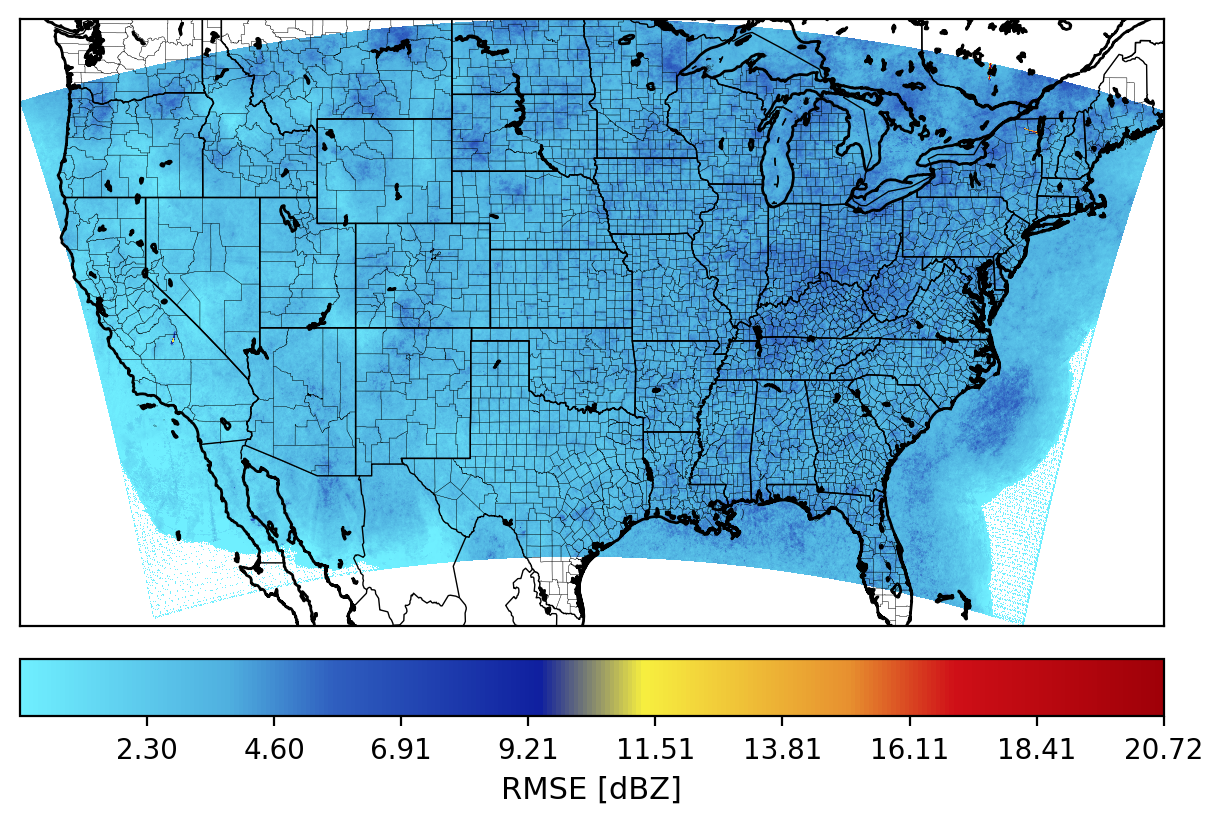

In [193]:
hrrr_grid_file = '/mnt/conus3/jason_conus3/code/hrrr_grid.bin'

nlon = 1799
nlat = 1059
count = nlat*nlon
shape = (nlat,nlon)

with open(hrrr_grid_file,'rb') as f:
    lon = np.fromfile(f,dtype=np.float64,count=count).reshape(shape)
    lat = np.fromfile(f,dtype=np.float64,count=count).reshape(shape)

#TODO: close :)
lon = lon[147:nlat-144, 153:nlon-110]
lat = lat[147:nlat-144, 153:nlon-110]

basemap = {}
basemap['projection'] = 'cyl'
basemap['resolution'] = 'i'
basemap['fix_aspect'] = False
basemap['llcrnrlon'] = lon.min()
basemap['urcrnrlon'] = lon.max()
basemap['llcrnrlat'] = lat.min()
basemap['urcrnrlat'] = lat.max()
basemap = Basemap(**basemap)

x,y = basemap(lon,lat)

fontsize = 11

# cmap = plt.get_cmap('YlOrRd')
# cmap.set_bad(color='white') # '#%02x%02x%02x'%(231, 231, 231))
# bounds = np.linspace(0, err.max(), 10).tolist()

rgb_colors = [] # new: CVD accessible
rgb_colors.append((111, 239, 255))  #5
rgb_colors.append(( 95, 207, 239))  #10
rgb_colors.append(( 79, 175, 223))  #15
rgb_colors.append(( 47,  95, 191))  #20
rgb_colors.append(( 31,  63, 175))  #25
rgb_colors.append(( 15,  31, 159))  #30
rgb_colors.append((247, 239,  63))  #35
rgb_colors.append((239, 191,  55))  #40
rgb_colors.append((231, 143,  47))  #45
rgb_colors.append((207,  15,  23))  #50
rgb_colors.append((183,   7,  15))  #55
rgb_colors.append((159,   0,   8))  #60

colors = []
for atup in rgb_colors:
    colors.append('#%02x%02x%02x'%atup)

cmap = LinearSegmentedColormap.from_list('distrib', colors)
cmap.set_over(colors[-1])
cmap.set_bad(color='white')

bounds = np.linspace(0, err.max(), 10).tolist()

# norm = plt.Normalize(bounds,cmap.N)

err_nan = np.ma.masked_where(err == 0.0, err)

fig = plt.figure(figsize=(6,4), constrained_layout=True)
plt.subplot(1, 1, 1)

pcm = basemap.pcolormesh(x,y,err_nan,cmap=cmap)

basemap.drawcoastlines()
basemap.drawcountries()
basemap.drawstates()
basemap.drawcounties()

cb = plt.colorbar(pcm,ticks=bounds,orientation='horizontal',fraction=0.1,pad=0.05)
cb.set_label('RMSE [dBZ]', fontsize=fontsize)

# fig.savefig(f'../media/spatial_errors.png', dpi=300, bbox_inches='tight')